In [18]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_data = pd.merge(ride_data, city_data,
                       how='left', on='city') 
merge_df = merge_data.groupby('city')['type'].sum()

neworder = ['city', 'date','fare','ride_id','driver_count','type']
merge_df=merge_data.reindex(columns=neworder)                     
# Display the data table for preview
merge_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [19]:
# Obtain the x and y coordinates for each of the three city types
combine_city = merge_df.groupby(["city"] + ["type"] +["driver_count"])
fares = combine_city["fare"].mean()
rides = combine_city["ride_id"].count()

df= pd.DataFrame({
    "average fare": fares, 
    "total rider": rides
})

df.reset_index(inplace=True)

df_urban = df.loc[df["type"] == "Urban",:]
df_rural = df.loc[df["type"] == "Rural",:]
df_suburban=df.loc[df["type"] == "Suburban",:]

df.head()



,city,type,driver_count,average fare,total rider
0,Amandaburgh,Urban,12,24.641667,18
1,Barajasview,Urban,26,25.332273,22
2,Barronchester,Suburban,11,36.422500,16
3,Bethanyland,Suburban,22,32.956111,18
4,Bradshawfurt,Rural,7,40.064000,10


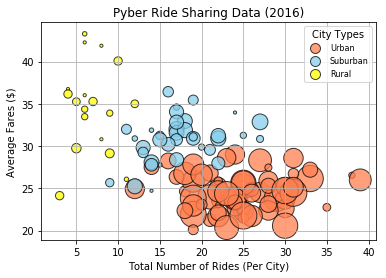

In [20]:
# Build the scatter plots for each city types
#print(urban)
plt.scatter(df_urban['total rider'], df_urban['average fare'] , marker="o", facecolors="coral", edgecolors="black",
            s=df_urban['driver_count']*10, alpha=0.75, linewidth=1, label='Urban')

#print(suburan)
plt.scatter(df_suburban['total rider'], df_suburban['average fare'] , marker="o", facecolors="skyblue", edgecolors="black",
            s=df_suburban['driver_count']*10, alpha=0.75, linewidth=1, label='Suburban')

#print(rural)
plt.scatter(df_rural['total rider'], df_rural['average fare'] , marker="o", facecolors="yellow", edgecolors="black",
            s=df_rural['driver_count']*10, alpha=0.75, linewidth=1, label='Rural')

# Incorporate the other graph properties
plt.grid(axis='both')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
# Create a legend
legend = plt.legend(title="City Types", loc='best', prop={'size': 8})
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
legend.legendHandles[2]._sizes = [100]
# Incorporate a text label regarding circle size
# Save Figure
plt.savefig("Images/Pyber_ride.png")

In [21]:
# Show plot
plt.show()

## Total Fares by City Type

4327.930000000002
type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


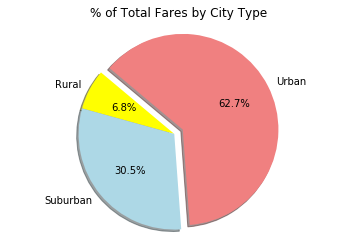

In [22]:
type_df = merge_df.groupby(["type"])
fares_per_type = type_df["fare"].sum()
print(fares_per_type[0])
print(fares_per_type)

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [fares_per_type[0], fares_per_type[1], fares_per_type[2]]

# The colors of each section of the pie chart
colors = ["yellow", "lightblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.savefig("Images/Pyber_fares.png")

In [23]:
# Show Figure
plt.show()



## Total Rides by City Type

125
type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


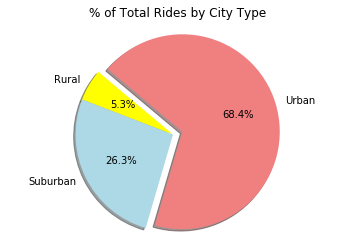

In [24]:
type_df = merge_df.groupby(["type"])
rides_per_type = type_df["ride_id"].count()
print(rides_per_type[0])
print(rides_per_type)

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rides_per_type[0], rides_per_type[1], rides_per_type[2]]

# The colors of each section of the pie chart
colors = ["yellow", "lightblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")
plt.axis("equal")

plt.savefig("Images/Pyber_Ride_pie.png")

In [25]:
# Show Figure
plt.show()

## Total Drivers by City Type

78
type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64


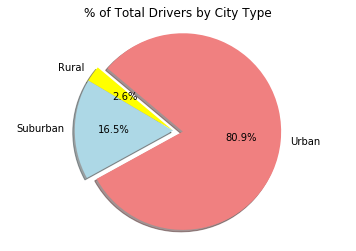

In [26]:
type_df = city_data.groupby(["type"])
drivers_per_type = type_df["driver_count"].sum()
print(drivers_per_type[0])
print(drivers_per_type)

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [drivers_per_type[0], drivers_per_type[1], drivers_per_type[2]]

# The colors of each section of the pie chart
colors = ["yellow", "lightblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")

plt.savefig("Images/Pyber_drivers.png")

In [27]:
# Show Figure
plt.show()